# 2. Basic Plotting using MatPlotLib

In this exercise, we will be plotting experimental data in Python using 'matplotlib'. (Explain what the purpose is of this exercise, why you will want this as an alternative to excel plots, and what some of the advantages are of using this method.)

# Exercise Outline
* Single line plot with annotation
* Multiple lines in one plot, using different styles and adding a legend
* Plot mean with sd as error bars
* Plot bar chart with mean and sd
* Save/export plot

# Setup and preparing the data

First we need to import some libraries to setup the script

In [1]:
%pylab inline
import csv
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Next, we import the data from file to a numpy array using `np.loadtxt`.

In [15]:
results = np.loadtxt('datafiles/Labresults.csv',delimiter=',')

We can also separate the data in 3 seperate numpy arrays (one for each column):

In [18]:
(conc,counts,run) = np.loadtxt('datafiles/Labresults.csv',delimiter=',',unpack=True)

Have a look at the data, what is in there?

*The data contains cell counts for a range of concentrations for 3 replicates (runs)*

# Basic line plotting

Now that we have loaded the data, we can plot the data. We want to plot the results for each replicate with a separate curve, hence we need to extract the data. Have a look at the columns we have just loaded, identify the indices for each run and separate the columns (name them `counts_r1`, `counts_r2` and `counts_r3`). Remember that `a[i:j]` gives you items `i` to `j` (excluding `j`) from `a`.

In [19]:
counts_r1 = counts[:6]
counts_r2 = counts[6:12]
counts_r3 = counts[12:]

Now, we have the values we want to plot on the y-axis, we need an x-axis. We cannot use the array `conc` directly, why?

In [20]:
# x and y must have the same length
print(counts_r1.shape,conc.shape)

(6,) (18,)


Create a list of concentrations that has the same length as `counts_r1` (or `counts_r2` or `counts_r3`). YOu can do this in the same way you created the lists for y-axis, or use `np.unique`.

In [21]:
conc_unique = np.unique(conc)

Now, create one figure with 3 lines, one for each replicate. Next, for each line, give them the following color(s) [blue, green, orange] and the following linestyle(s) [':', '-', '--']. The arguments color and linestyle both go in the plot statement

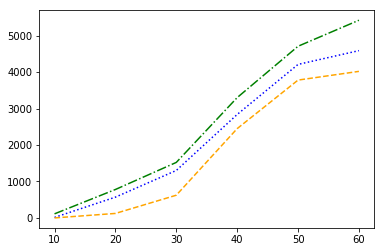

In [23]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1, color='blue', linestyle=':')
ax.plot(conc_unique,counts_r2, color='green', linestyle='-.')
ax.plot(conc_unique,counts_r3, color='orange', linestyle='--')

Next, we add markers to the lines to make clear what the actual data is. Use the `marker` to add different markers to each line (possible markers can be found [here](https://matplotlib.org/api/markers_api.html)):

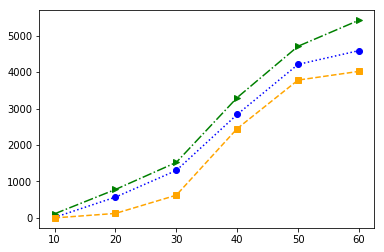

In [25]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc_unique,counts_r1, color='blue', linestyle=':',marker='o')
ax.plot(conc_unique,counts_r2, color='green', linestyle='-.',marker='>')
ax.plot(conc_unique,counts_r3, color='orange', linestyle='--',marker='s')

# Annotation

Next, annotation needs to be added. First, the graph itself needs a name, and the y and x axes should be named. This can be done in ax.set.
Add names to the lines, by adding a label in the ax.plot calls for each series. Label them with 'Run 1', 'Run 2', 'Run 3'.
Add a legend as well in the topleft corner by using the 'loc' parameter (https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend) and finally complete the picture by putting the ylim to 6000, so that y-axis doesnt stop halfway the 5000 tick.

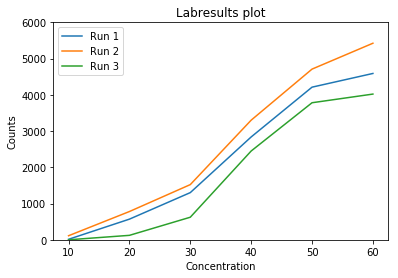

In [6]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.plot(conc,counts[:6], color='blue', linestyle=':', label='Run 1')
ax.plot(conc,counts[6:12], color='green', linestyle='-.', label='Run 2')
ax.plot(conc,counts[12:], color='orange', linestyle='--', label='Run 3')
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend(loc=2)

# Mean/SD plotting

To follow this up, we want to get the mean of the three runs for each concentration, calculate the sd and then plot the error bars, all with only 1 line displayed in the port. Note that you have to calculate the mean over an interval of 6. However there is a trick to calculate this with np.

[  42.          491.         1149.33333333 2863.         4234.66666667
 4678.33333333]
[ 49.82636518 273.97445136 382.95372508 347.8687492  379.19329577
 576.16799248]


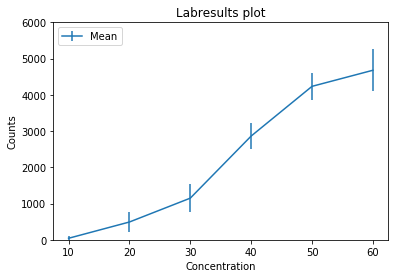

In [7]:
counts_mean = np.mean(counts.reshape(-1,6), axis=0) #keep this line in
counts_std = np.std(counts.reshape(-1,6), axis=0) #keep this line in
print(counts_mean)
print(counts_std)

fig = plt.figure(figsize=(6,4))
ax = plt.gca()
ax.errorbar(conc,counts_mean, yerr=counts_std, label='Mean') #keep this line in
ax.set(title='Labresults plot',xlabel='Concentration',ylabel='Counts', ylim=[0,6000])
ax.legend(loc=2)

# Bar Charts

We can plot this in a bar chart as well, using the same x and y. Plot the concentration as x and the mean as y, as well as error bars. Make the width of the bars 0,6. 

Text(0.5,0,'Concentration')

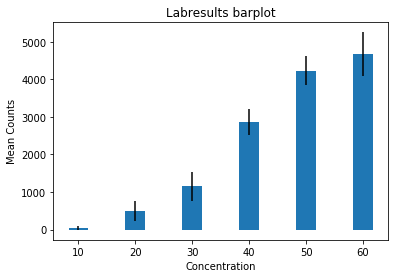

In [8]:
plt.bar(conc,counts_mean, 3.5, yerr=counts_std)
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')

Instead of calculating the mean between the runs, we can also calculate them between the runs. Again we calculate the mean, but this time we are going to plot them into a bar chart. Leave the standard deviants out, as these will just be the complete error bar

[2254.33333333 2641.66666667 1833.16666667]


Text(0.5,0,'Concentration')

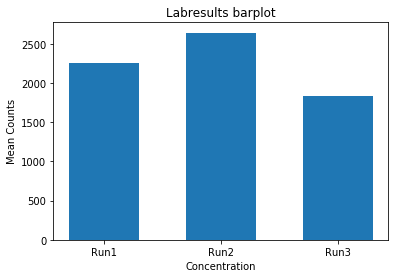

In [9]:
counts_mean2 = np.mean(counts.reshape(-1,6), axis=1)
print(counts_mean2)

plt.bar(['Run1','Run2','Run3'],counts_mean2, 0.6)
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')

For our last bar plot, we want multiple bars per concentration, displaying the concentration. Essentially this is the same as the line plot that was created, but now in bar form. To do this, for each bar. First define a width of 3. To create the 3 bars next to eachother, we substract or add the width to the first and third bar. What this does is placing the bars (for the first concentration) at 7, 10 and 13, but this will display fine in the plot itself. Don't forgot to label each bar with 'Run X'

In [ ]:
w = 3
plt.bar(conc-w,counts[:6], w, label='Run 1')
plt.bar(conc,counts[6:12], w, label='Run 2')
plt.bar(conc+w,counts[12:], w, label='Run 3')
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')

# Exporting figures

To finalize our plots and use them in future documents, we can save them using savefig. Do this for our previous bar plot and save it as a '.png' and a '.svg'.
If you want to save any of the other plots, put this line of code at the end of the codeblocks and give them an appropiate name

In [1]:
w = 3
plt.bar(conc-w,counts[:6], w, label='Run 1')
plt.bar(conc,counts[6:12], w, label='Run 2')
plt.bar(conc+w,counts[12:], w, label='Run 3')
plt.title('Labresults barplot')
plt.ylabel('Mean Counts')
plt.xlabel('Concentration')
plt.savefig('barplot1.png')
plt.savefig('barplot2.svg')

NameError: name 'plt' is not defined

# Final assignment

Collect all the plots and put them in one large overview, in a grid of 3x2 with the line plots on top and the bar plots on the bottom.